## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('banking.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


###  Target Variable  = y = client subscribed a term deposit is  Numeric


In [3]:
#Remove duplicate Entries
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
17977,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
19339,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
24769,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
25634,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
28143,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,0
29352,71,retired,single,university.degree,no,no,no,telephone,oct,tue,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
29936,45,admin.,married,university.degree,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,-2.9,92.469,-33.6,1.072,5076.2,1
34333,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
37154,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
39423,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
#Checking Unique values in each variable
df.nunique()

#The features 'age', 'duration', 'campaign', 'pdays', contain a lot of unique values.

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp_var_rate        10
cons_price_idx      26
cons_conf_idx       26
euribor3m          316
nr_employed         11
y                    2
dtype: int64

# More EDA

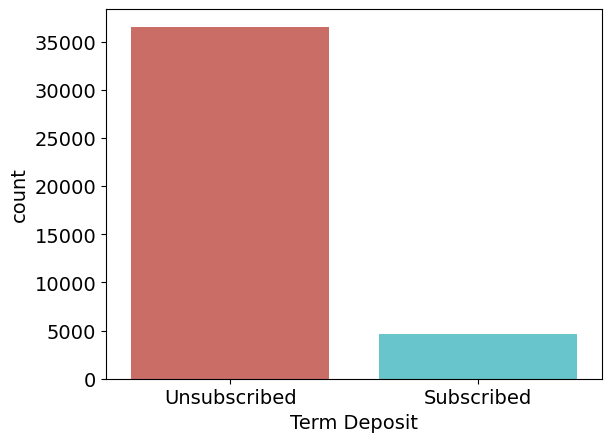

<Figure size 640x480 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.rc("font", size=14)
sns.countplot(x='y',data=df, palette='hls')
plt.xlabel('Term Deposit')
plt.xticks([0, 1], ['Unsubscribed', 'Subscribed'])
plt.show()
plt.savefig('count_plot')

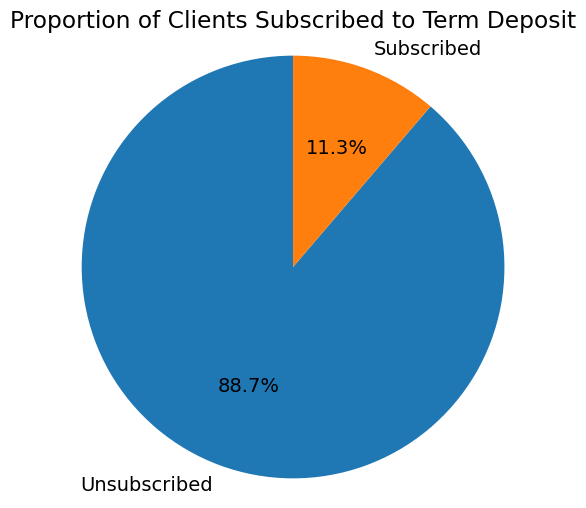

In [7]:
# Calculate the proportions of each class
class_counts = df['y'].value_counts()
proportions = class_counts / len(df)

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(proportions, labels=['Unsubscribed', 'Subscribed'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Clients Subscribed to Term Deposit')
plt.axis('equal')  # Ensure the pie chart is a circle
plt.show()

### More Understanding of numerical variables(mean) with respect to our target variable

In [8]:
# Select only numerical features
numerical_features = df.select_dtypes(include=np.number)

# Create a new dataframe with only numerical features
numerical_df = df[numerical_features.columns]

numerical_df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.910994,220.868079,2.633385,984.109396,0.132414,0.248885,93.603798,-40.593232,3.811482,5176.165690
1,40.912266,553.256090,2.051951,791.990946,0.492779,-1.233089,93.354577,-39.791119,2.123362,5095.120069


### Observations:
1 average age of customers who bought  term deposit >  customers who didn't by slight margin. <br>
2.pdays (days since the customer was last contacted) is lower for the customers who bought it.  <br>
    The lower the pdays, more better chances of a subsribing to term deposit. <br>
3. campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

# Features vs Target Variables --- bargraphs and piecharts

### Depostis vs Marital Status

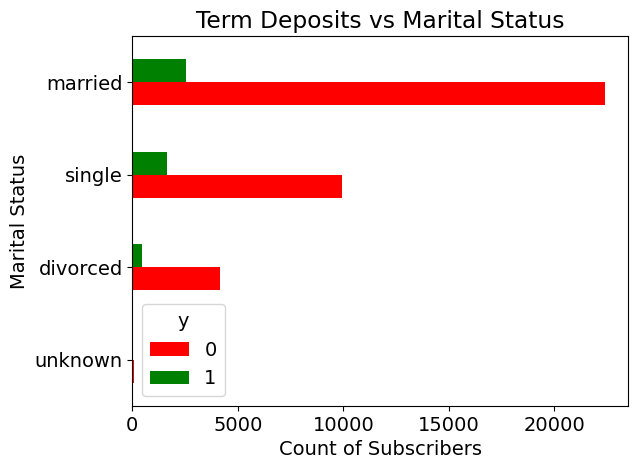

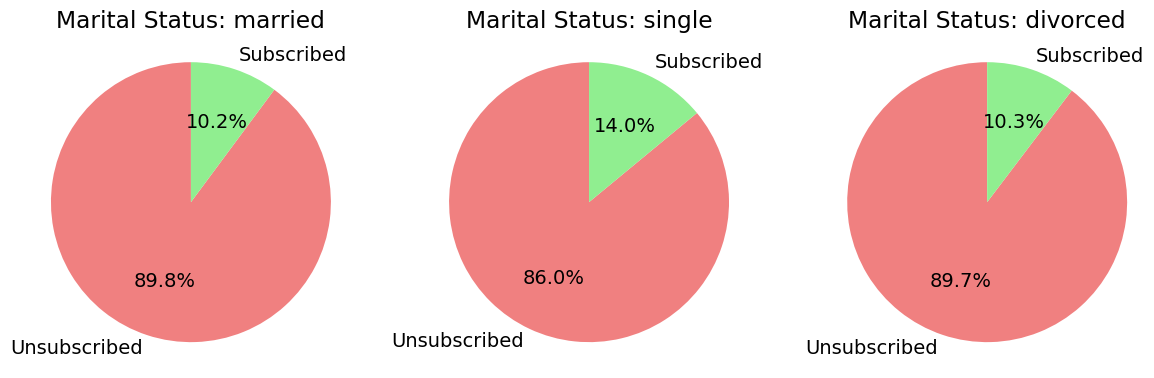

In [9]:
pd.crosstab(df.marital,df.y).sort_values(by=0).plot(kind='barh', color=['red', 'green'])
plt.title('Term Deposits vs Marital Status')
plt.xlabel('Count of Subscribers')
plt.ylabel('Marital Status')
plt.savefig('edu vs subsriptions')

#Pie Charts
marital_counts = df.groupby(['marital', 'y']).size().unstack()
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # Adjust figsize as needed
colors = ['lightcoral', 'lightgreen']
marital_statuses = ['married', 'single', 'divorced']
for i, status in enumerate(marital_statuses):
    counts = marital_counts.loc[status]
    axes[i].pie(counts, labels=['Unsubscribed', 'Subscribed'], autopct='%1.1f%%', colors=colors, startangle=90)
    axes[i].set_title(f'Marital Status: {status}')
    axes[i].axis('equal')  # Ensure the pie chart is a circle

plt.tight_layout()
plt.show()

### Depostis vs Education

In [10]:
#  group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".

df['education']=np.where(df['education'] =='basic.9y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.6y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.4y', 'Basic', df['education'])

df['education'].value_counts()

education
Basic                  12512
university.degree      12164
high.school             9512
professional.course     5240
unknown                 1730
illiterate                18
Name: count, dtype: int64

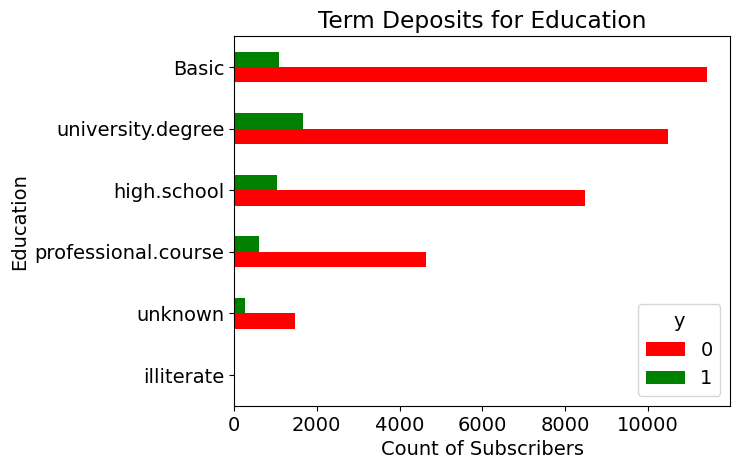

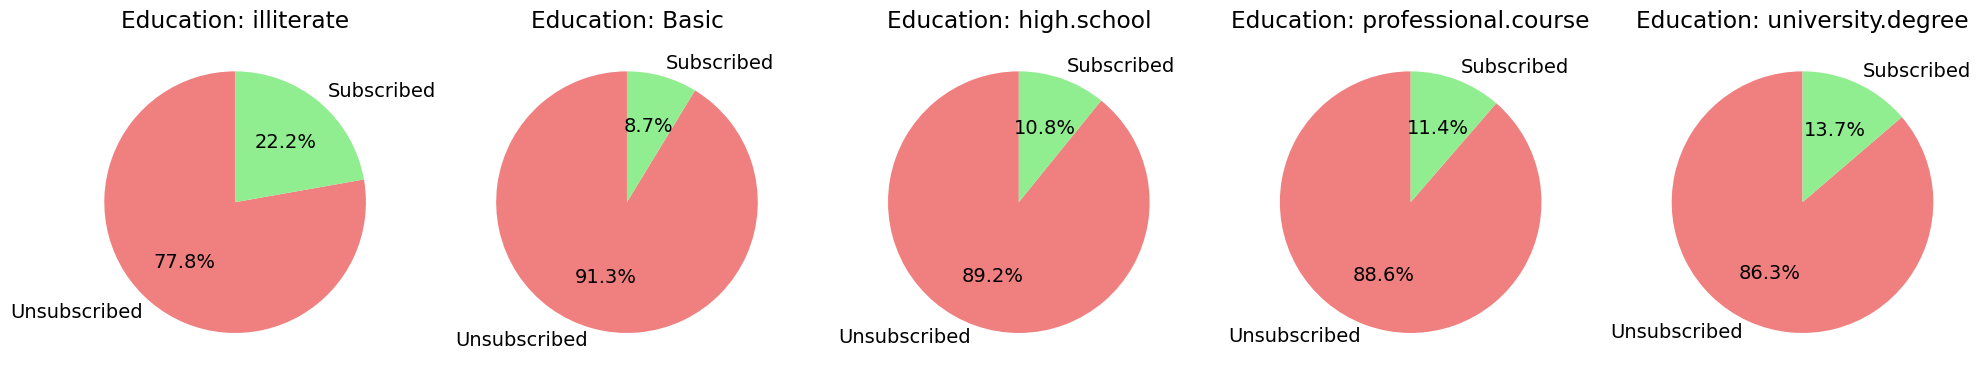

In [11]:
pd.crosstab(df.education,df.y).sort_values(by=0).plot(kind='barh', color=['red', 'green'])
plt.title('Term Deposits for Education')
plt.xlabel('Count of Subscribers')
plt.ylabel('Education')
plt.savefig('edu vs subsriptions')
plt.show()
education_counts = df.groupby(['education', 'y']).size().unstack()

fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # Adjust figsize as needed
colors = ['lightcoral', 'lightgreen']

education_levels = ['illiterate', 'Basic', 'high.school', 'professional.course', 'university.degree']
for i, level in enumerate(education_levels):
    # Get counts for the current education level
    counts = education_counts.loc[level]
    
    # Create pie chart
    axes[i].pie(counts, labels=['Unsubscribed', 'Subscribed'], autopct='%1.1f%%', colors=colors, startangle=90)
    axes[i].set_title(f'Education: {level}')
    axes[i].axis('equal')  # Ensure the pie chart is a circle
plt.tight_layout()
plt.show()

### Depostis vs Job

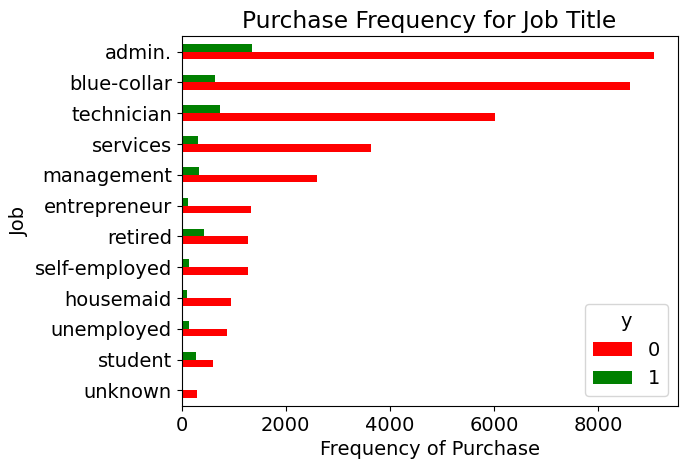

In [12]:
pd.crosstab(df.job,df.y).sort_values(by=0).plot(kind='barh', color=['red', 'green'])
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Frequency of Purchase')
plt.ylabel('Job')
plt.savefig('jobs vs subsriptions')

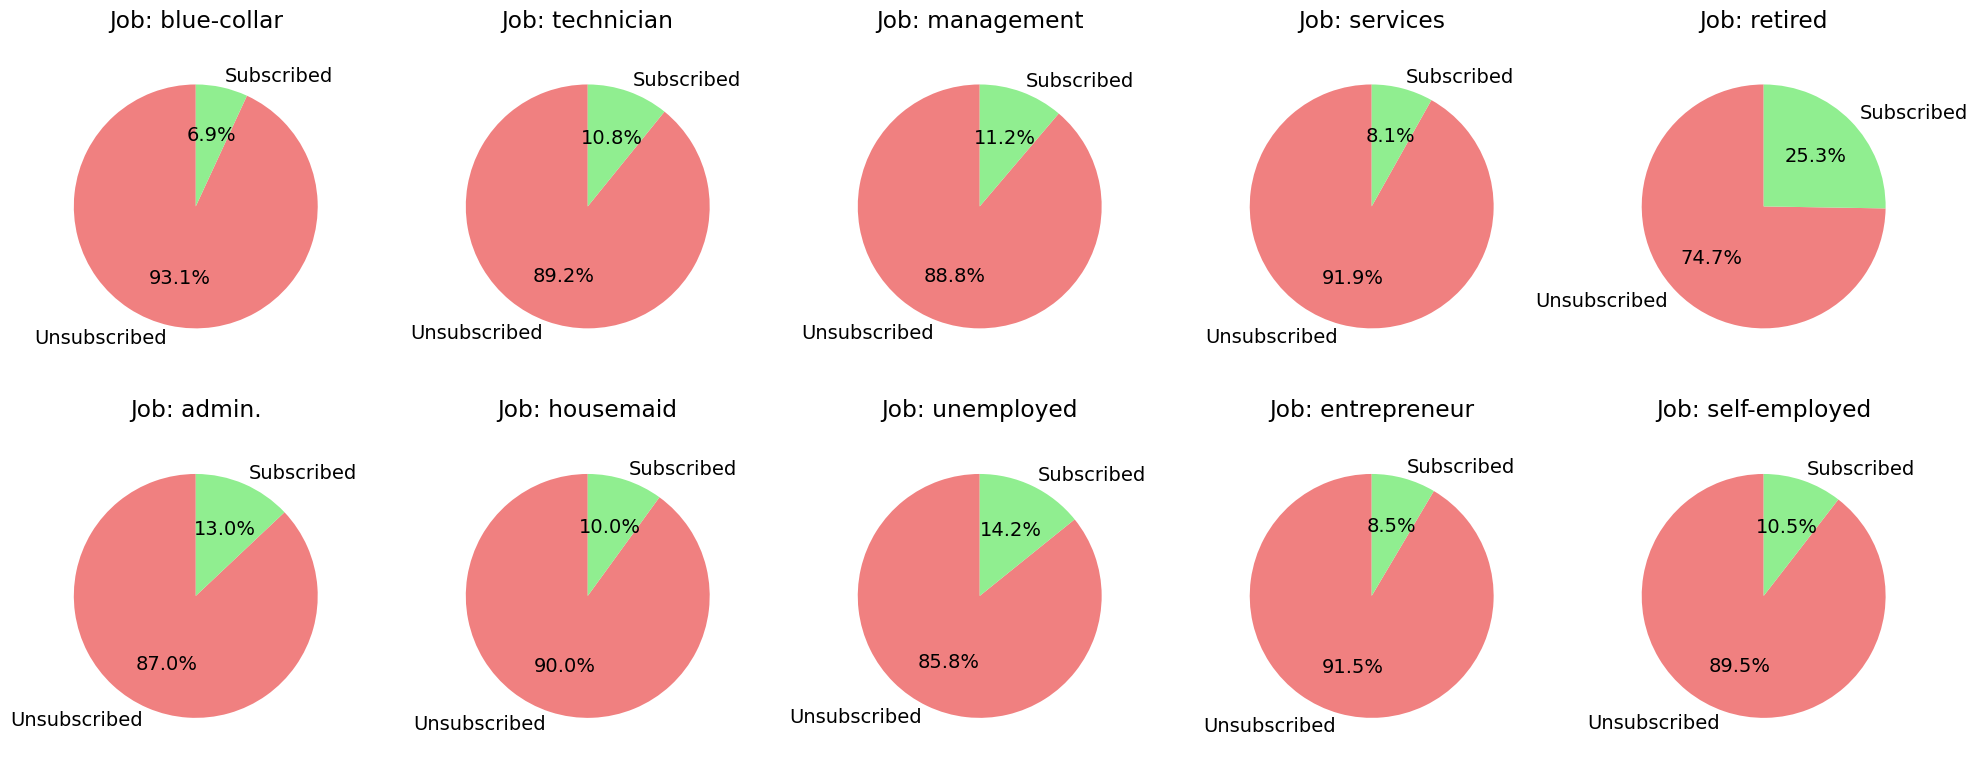

In [13]:
import matplotlib.pyplot as plt
job_counts = df.groupby(['job', 'y']).size().unstack()
fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # Adjust figsize as needed
colors = ['lightcoral', 'lightgreen']
job_titles = df['job'].unique()
for i in range(2):
  for j in range(5):
    index = i * 5 + j
    if index < len(job_titles):
      job = job_titles[index]
      counts = job_counts.loc[job]
      axes[i, j].pie(counts, labels=['Unsubscribed', 'Subscribed'], autopct='%1.1f%%', colors=colors, startangle=90)
      axes[i, j].set_title(f'Job: {job}')
      axes[i, j].axis('equal')  # Ensure the pie chart is a circle

# Adjust layout and display
plt.tight_layout()
plt.show()


### Depostis vs Age

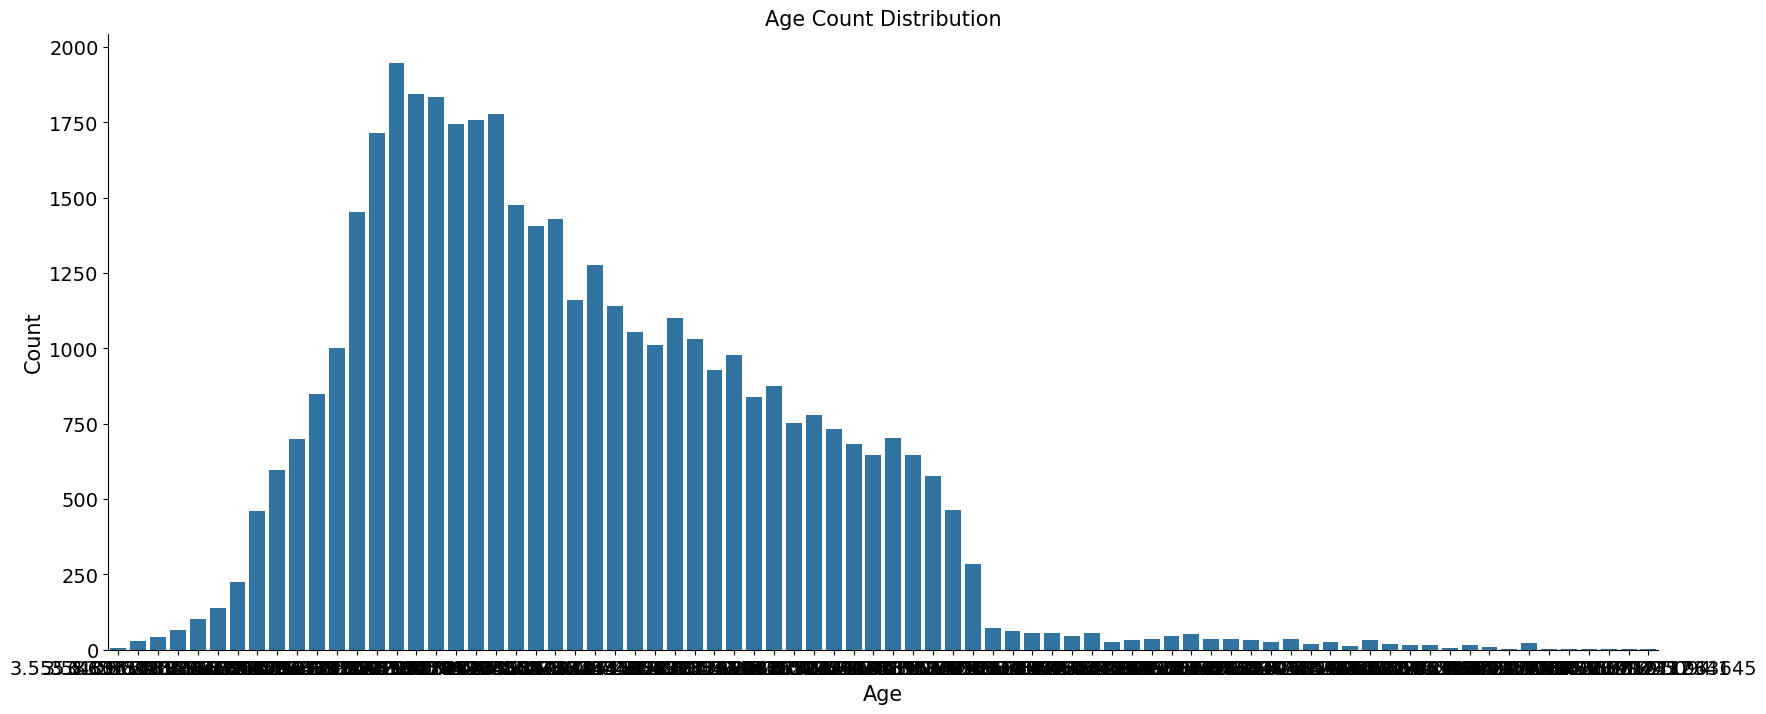

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data =  df)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.color_palette("Spectral", as_cmap=True)
sns.despine()

In [49]:
# Create a new column for age groups
df['age_group'] = pd.cut(df['age'], bins=[18, 28, 45, 60, 90], labels=['young adults(18-28)', 'adults(29-45)', 'boomer adults(46-60)', 'retirees(60+)'])

# Create a new dataframe with the age group and y column
new_df = df[['age_group', 'y']]

# Display the new dataframe
pd.crosstab(new_df.age_group,new_df.y).sort_values(by=0).plot(kind='barh', color=['red', 'green'])
plt.title('Term Deposits for Age')
plt.xlabel('Count of Subscribers')
plt.ylabel('Age')
plt.savefig('age vs subsriptions')

KeyError: 0

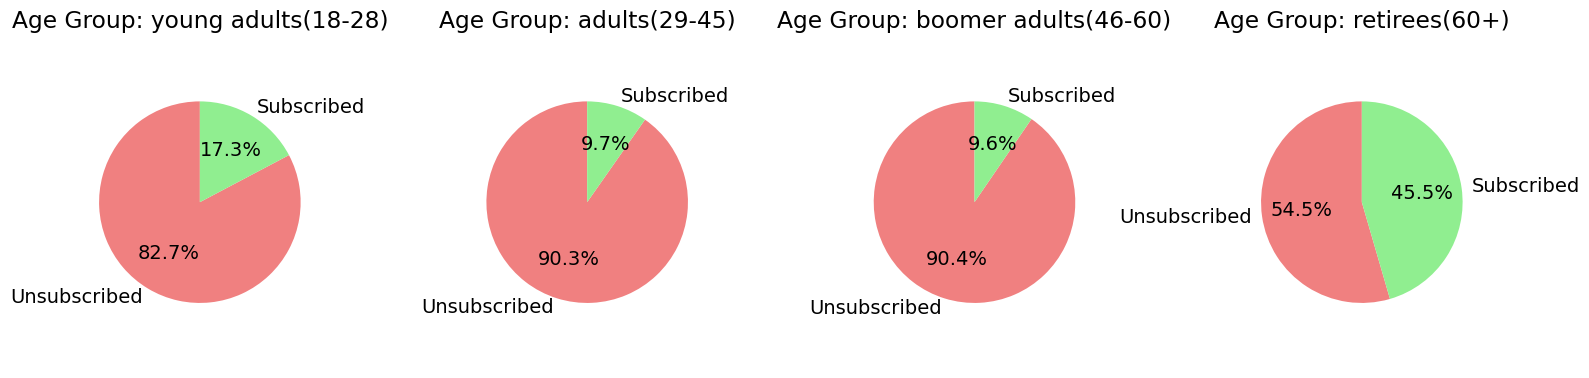

In [16]:
age_group_counts = new_df.groupby(['age_group', 'y']).size().unstack()

# Create subplots for pie charts
fig, axes = plt.subplots(1, 4, figsize=(16, 4))  # Adjust figsize as needed

# Define colors for pie charts
colors = ['lightcoral', 'lightgreen']

# Iterate through age groups and create pie charts
age_groups = ['young adults(18-28)', 'adults(29-45)', 'boomer adults(46-60)', 'retirees(60+)']
for i, group in enumerate(age_groups):
    # Get counts for the current age group
    counts = age_group_counts.loc[group]
    
    # Create pie chart
    axes[i].pie(counts, labels=['Unsubscribed', 'Subscribed'], autopct='%1.1f%%', colors=colors, startangle=90)
    axes[i].set_title(f'Age Group: {group}')
    axes[i].axis('equal')  # Ensure the pie chart is a circle

# Adjust layout and display
plt.tight_layout()
plt.show()

### Depostis vs Day of week

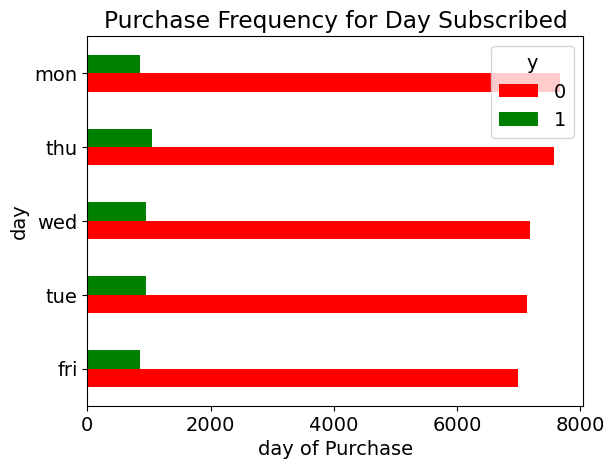

In [17]:
pd.crosstab(df.day_of_week,df.y).sort_values(by=0).plot(kind='barh', color=['red', 'green'])
plt.title('Purchase Frequency for Day Subscribed')
plt.xlabel('day of Purchase')
plt.ylabel('day')
plt.savefig('day vs subsriptions')

#### Almost all the days of week show similar deposit subscribes and non subscribers hence this feature can be ignored

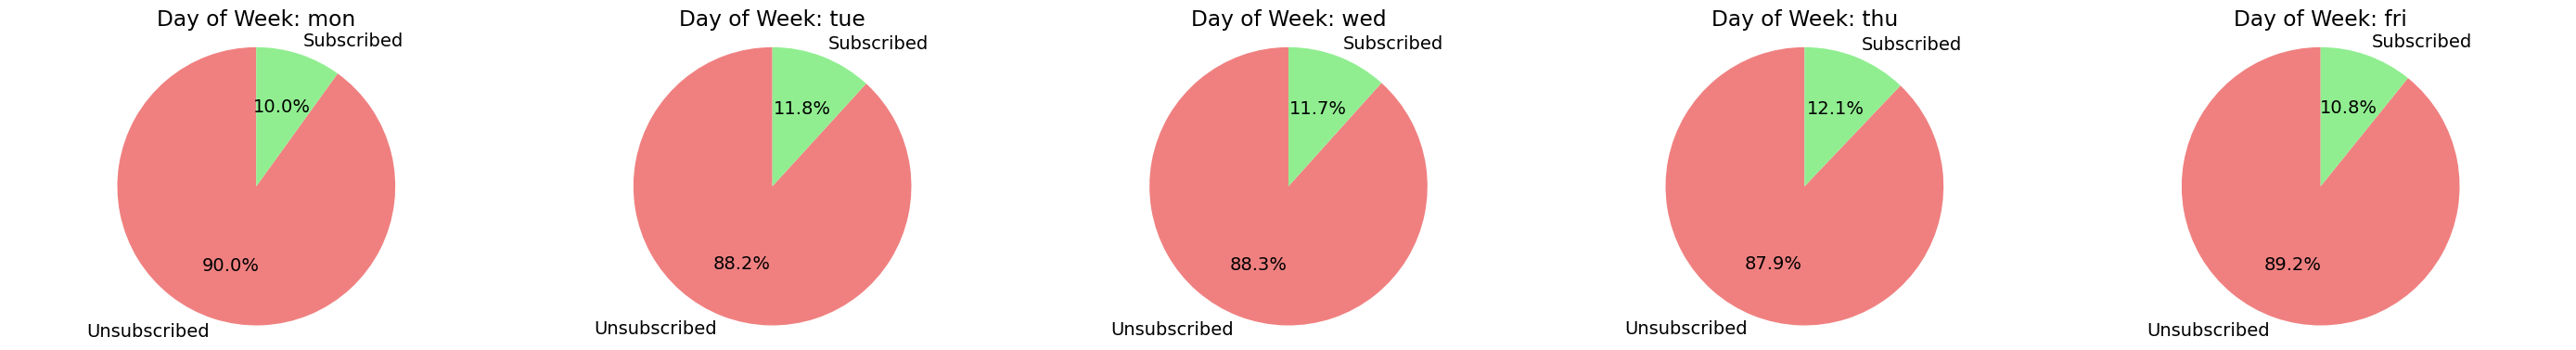

In [18]:
day_of_week_counts = df.groupby(['day_of_week', 'y']).size().unstack()
fig, axes = plt.subplots(1, 5, figsize=(28, 4))  # Adjust figsize as needed
colors = ['lightcoral', 'lightgreen']
days_of_week = ['mon', 'tue', 'wed', 'thu', 'fri']
for i, day in enumerate(days_of_week):
    counts = day_of_week_counts.loc[day]
    axes[i].pie(counts, labels=['Unsubscribed', 'Subscribed'], autopct='%1.1f%%', colors=colors, startangle=90)
    axes[i].set_title(f'Day of Week: {day}')
    axes[i].axis('equal') 
plt.tight_layout()
plt.show()

### Depostis vs Month Subscribed

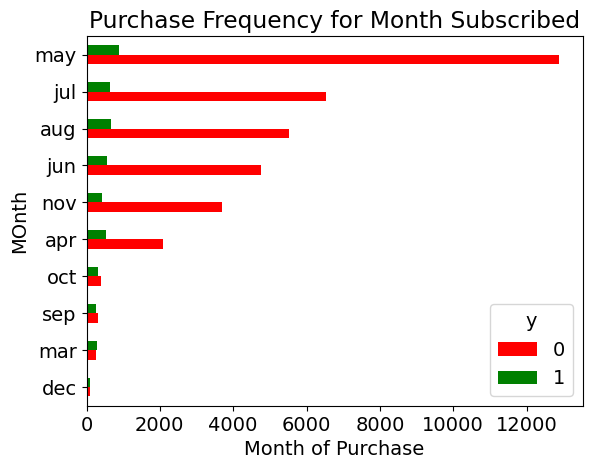

In [19]:
pd.crosstab(df.month,df.y).sort_values(by=0).plot(kind='barh', color=['red', 'green'])
plt.title('Purchase Frequency for Month Subscribed')
plt.xlabel('Month of Purchase')
plt.ylabel('MOnth')
plt.savefig('Month vs subsriptions')

### Depostis vs Previous campaign

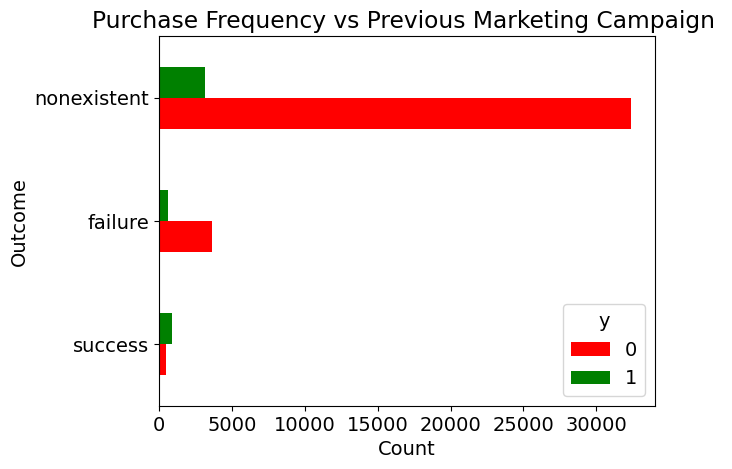

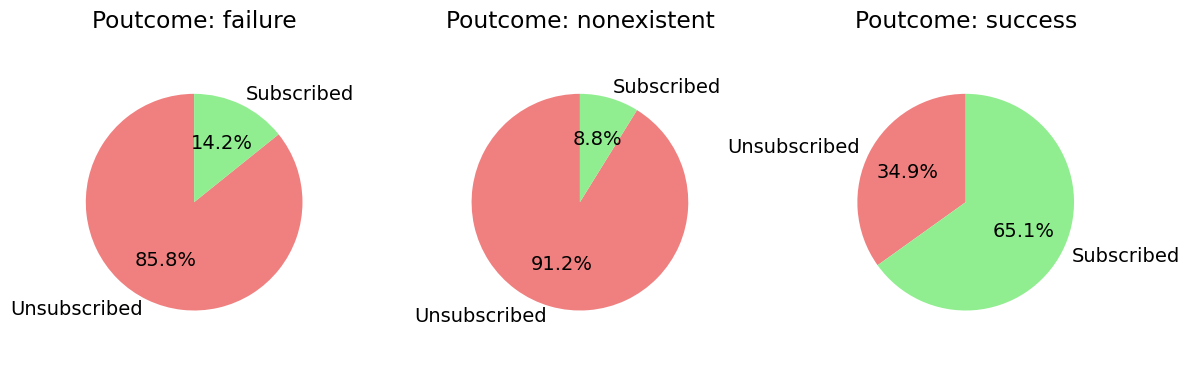

In [20]:

pd.crosstab(df.poutcome,df.y).sort_values(by=0).plot(kind='barh', color=['red', 'green'])
plt.title('Purchase Frequency vs Previous Marketing Campaign ')
plt.xlabel('Count')
plt.ylabel('Outcome')
plt.show()

#Piechaarts
poutcome_counts = df.groupby(['poutcome', 'y']).size().unstack()
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # Adjust figsize as needed
colors = ['lightcoral', 'lightgreen']
poutcome_categories = ['failure', 'nonexistent', 'success']
for i, category in enumerate(poutcome_categories):
    counts = poutcome_counts.loc[category]
    axes[i].pie(counts, labels=['Unsubscribed', 'Subscribed'], autopct='%1.1f%%', colors=colors, startangle=90)
    axes[i].set_title(f'Poutcome: {category}')
    axes[i].axis('equal') 
plt.tight_layout()
plt.show()

### Depostis vs Housing

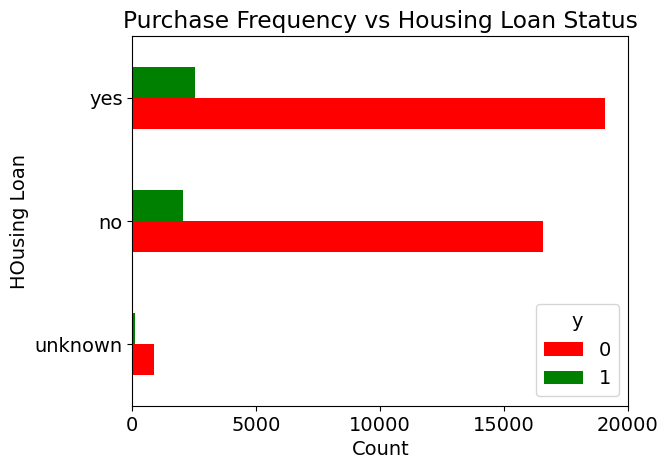

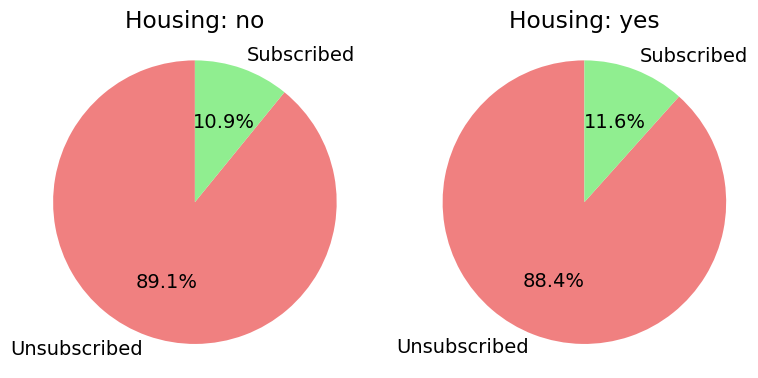

In [21]:
pd.crosstab(df.housing,df.y).sort_values(by=0).plot(kind='barh', color=['red', 'green'])
plt.title('Purchase Frequency vs Housing Loan Status')
plt.xlabel('Count')
plt.ylabel('HOusing Loan')
plt.show()

# Piecharts
housing_counts = df.groupby(['housing', 'y']).size().unstack()
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # Adjust figsize as needed
colors = ['lightcoral', 'lightgreen']

housing_values = ['no', 'yes']
for i, value in enumerate(housing_values):
    counts = housing_counts.loc[value]
    
    # Create pie chart
    axes[i].pie(counts, labels=['Unsubscribed', 'Subscribed'], autopct='%1.1f%%', colors=colors, startangle=90)
    axes[i].set_title(f'Housing: {value}')
    axes[i].axis('equal') 
plt.tight_layout()
plt.show()

## Corelation Matrix to find if any corelation exist between our features

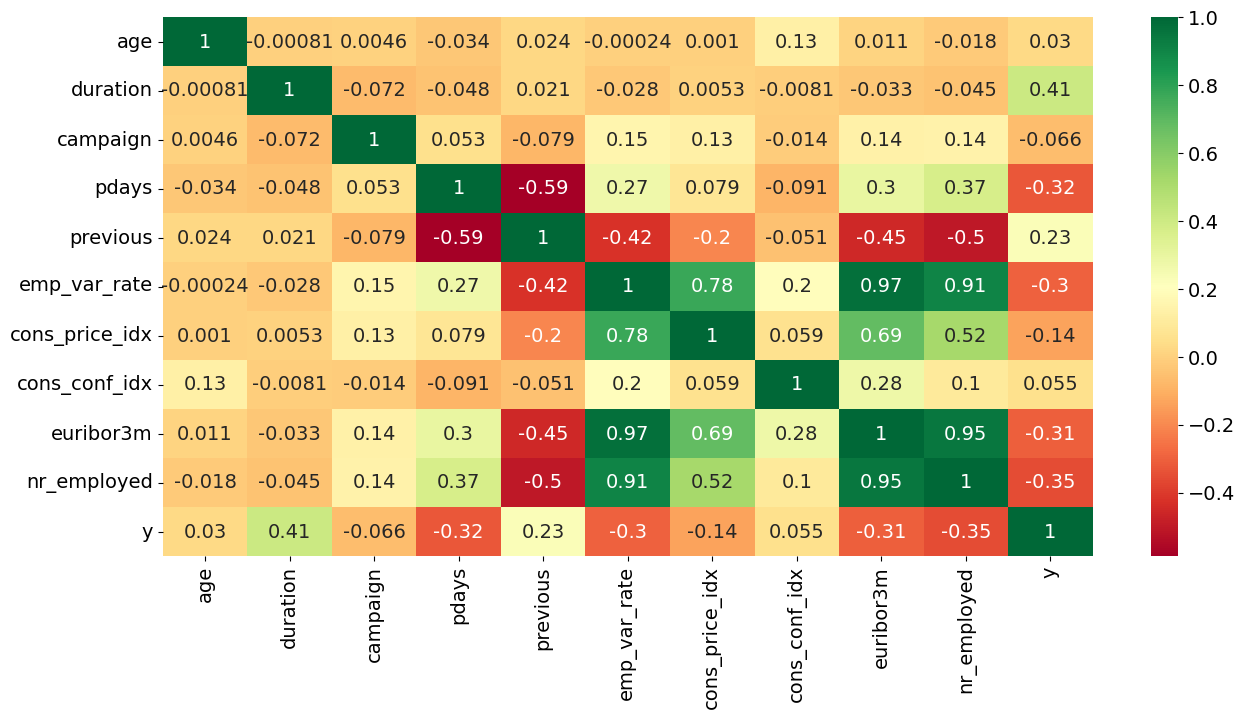

In [22]:
cor_mat = df.select_dtypes(include=['number']) 
cor_mat = cor_mat.corr()

fig = plt.figure(figsize=(15, 7))
sns.heatmap(cor_mat, annot=True, cmap='RdYlGn')  # Use 'RdYlGn' colormap
plt.show()

In [23]:
# DAtA TRANSFORMATION

### From dataset description, we won't use 'duration' column. 
"feature is highly predictive but should be handled carefully in predictive modelling"
Reason: it has an differnt relationship with  target variable y.  totally depends on client
If there were no phone calls (i.e. duration =0) then our target, y, has to be no. 
This will cause some unbalancing in the model and would inhibit the predictive power. 
In order to have a more realistic prediction, we will drop this column from our dataframe.

We can't predict how long we gonna talk to the client (duration) and 
how many calls would require to get the answer about deposit (campaign), so let's drop these! 



## OUTLIERS HANDLING

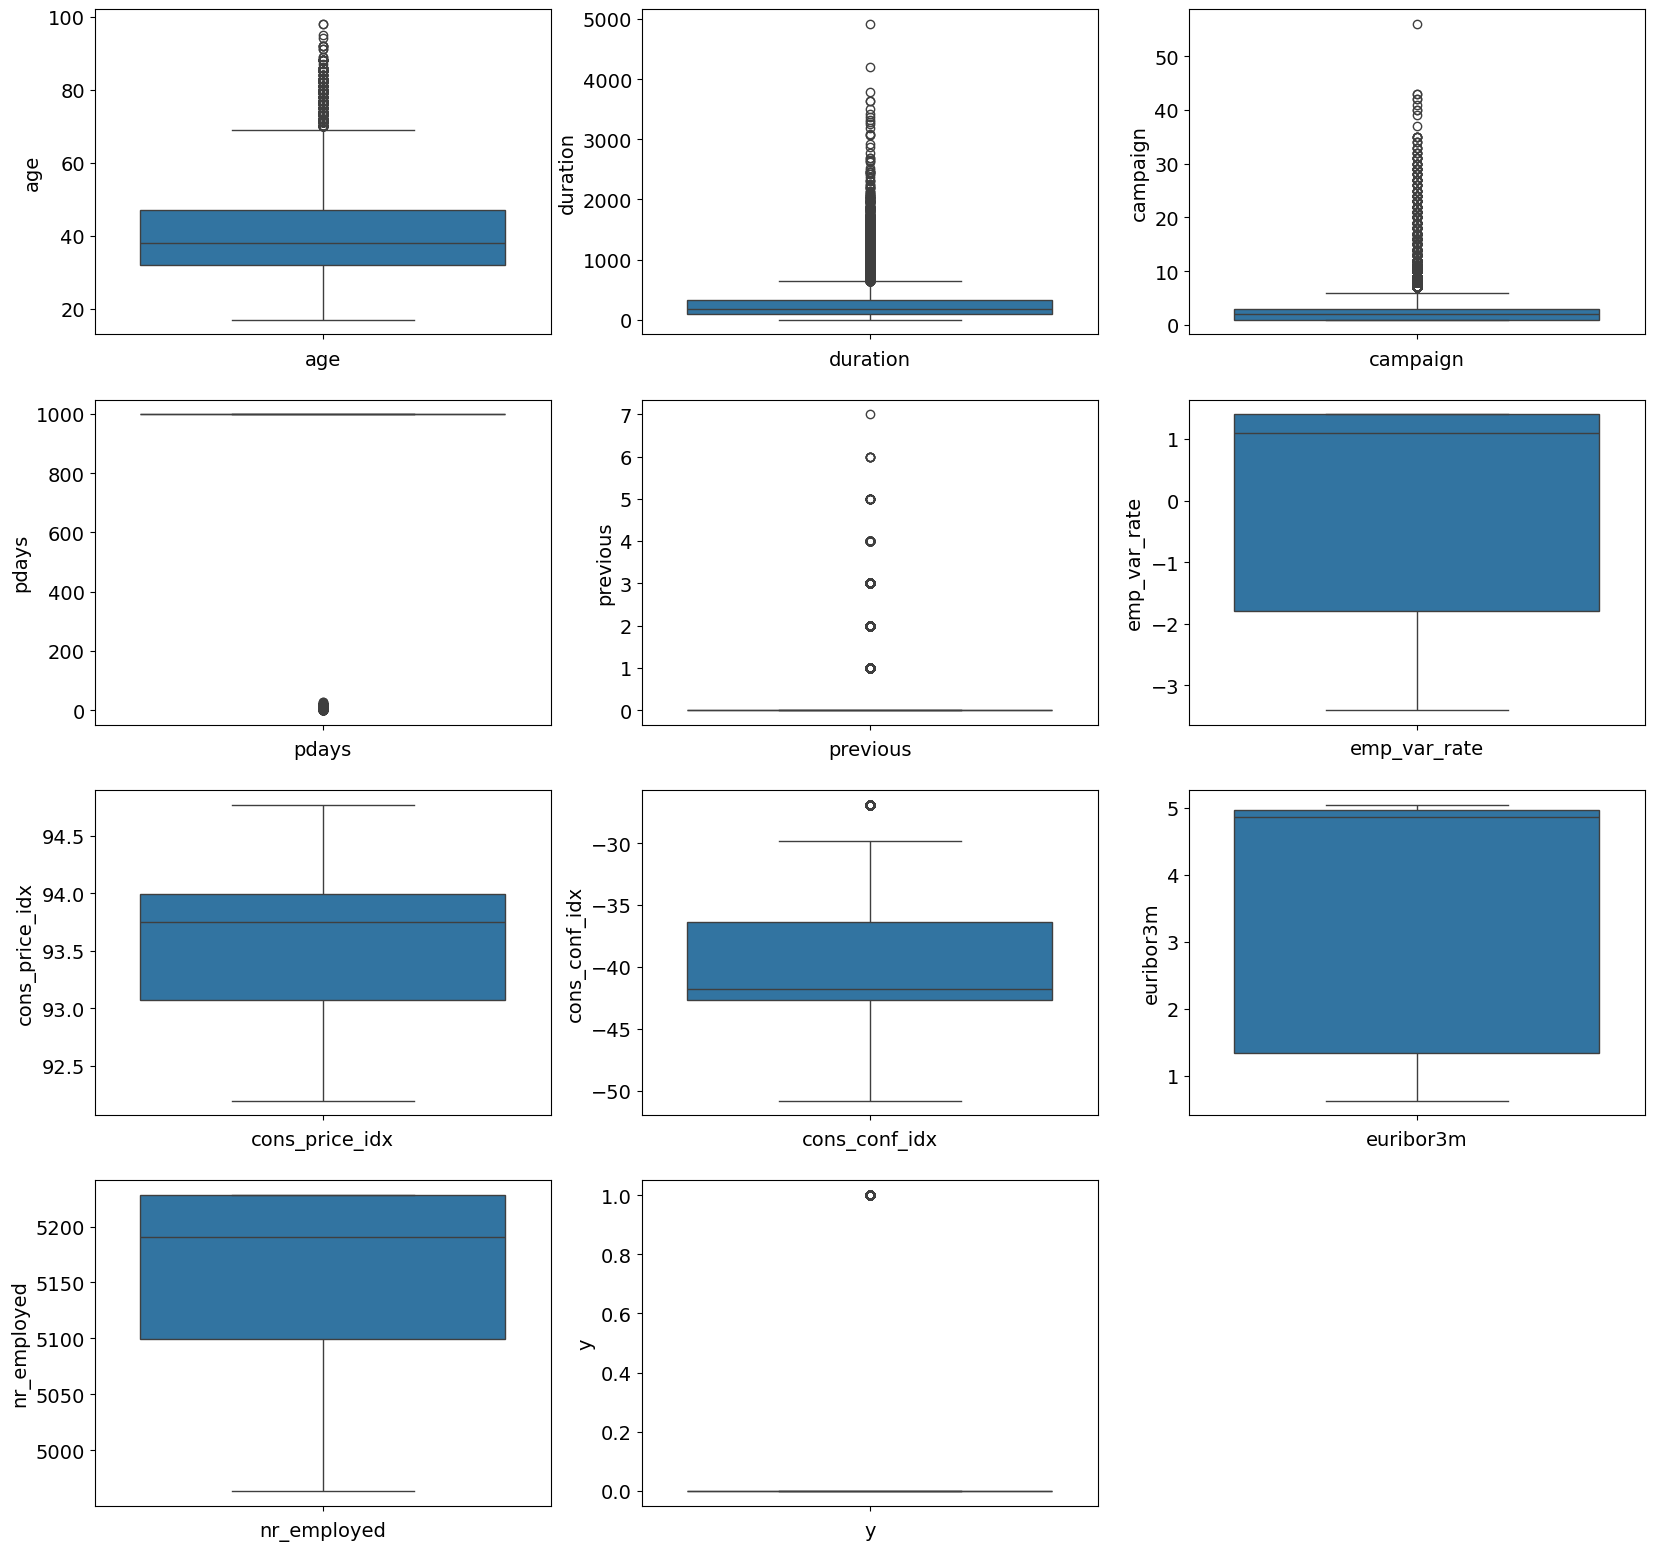

In [24]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

In [25]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41176 non-null  int64   
 1   job             41176 non-null  object  
 2   marital         41176 non-null  object  
 3   education       41176 non-null  object  
 4   default         41176 non-null  object  
 5   housing         41176 non-null  object  
 6   loan            41176 non-null  object  
 7   contact         41176 non-null  object  
 8   month           41176 non-null  object  
 9   day_of_week     41176 non-null  object  
 10  duration        41176 non-null  int64   
 11  campaign        41176 non-null  int64   
 12  pdays           41176 non-null  int64   
 13  previous        41176 non-null  int64   
 14  poutcome        41176 non-null  object  
 15  emp_var_rate    41176 non-null  float64 
 16  cons_price_idx  41176 non-null  float64 
 17  cons_conf_idx   4

## 3 DATA TRANSFORMATION TO TREAT OUTLIERS

Age: Caps ages greater than 72 to 72.

Campaign: Capped the campaign feature at its 95th percentile.

Pdays: Created a new feature pdays_new that labels contacts as "Not Contacted" (999) or "Contacted."

Previous: Bins the previous contacts into categories (No Contact, 1-2, 3-5, and 5+).

Cons_conf_idx: Caps extreme negative values at the 5th percentile.***

In [30]:
df= df.drop(['duration','campaign','age_group','euribor3m','nr_employed',],axis=1)

KeyError: "['duration', 'campaign', 'age_group', 'euribor3m', 'nr_employed'] not found in axis"

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  pdays           41176 non-null  int64  
 11  previous        41176 non-null  int64  
 12  poutcome        41176 non-null  object 
 13  emp_var_rate    41176 non-null  float64
 14  cons_price_idx  41176 non-null  float64
 15  cons_conf_idx   41176 non-null  float64
 16  y               41176 non-null  int64  
dtypes: float64(3), int64(4), object(10)


In [34]:
def get_feature_cols(df):
    feature_cols=[]
    for col in df.columns:
        if col=='age':
            feature_cols.append(col)
    print(feature_cols)
    return feature_cols

# This removes the outliers
def handle_outliers(df, colm):
    '''Change the values of outlier to upper and lower whisker values '''
    q1 = df.describe()[colm].loc["25%"]
    q3 = df.describe()[colm].loc["75%"]
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    for i in df.index: # Use df.index to iterate over the DataFrame index
        if df.loc[i,colm] > upper_bound:
            df.loc[i,colm]= upper_bound
        if df.loc[i,colm] < lower_bound:
            df.loc[i,colm]= lower_bound
    return df
def treat_outliers(df):
    df_outlier_treated = df.copy()
    feature_cols=get_feature_cols(df)
    for col in feature_cols:
        df_outlier_treated = handle_outliers(df_outlier_treated, col)
    return df_outlier_treated

In [35]:
# Apply the function to banking dataset
cleaned_df = treat_outliers(df)

# Verify the results
cleaned_df.head()

['age']


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,y
0,44.0,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,999,0,nonexistent,1.4,93.444,-36.1,0
1,53.0,technician,married,unknown,no,no,no,cellular,nov,fri,999,0,nonexistent,-0.1,93.200,-42.0,0
2,28.0,management,single,university.degree,no,yes,no,cellular,jun,thu,6,2,success,-1.7,94.055,-39.8,1
3,39.0,services,married,high.school,no,no,no,cellular,apr,fri,999,0,nonexistent,-1.8,93.075,-47.1,0
4,55.0,retired,married,Basic,no,yes,no,cellular,aug,fri,3,1,success,-2.9,92.201,-31.4,1


In [36]:
cleaned_df.describe()

,age,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,y
count,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,39.939236,962.464810,0.173013,0.081922,93.575720,-40.502863,0.112663
std,10.128801,186.937102,0.494964,1.570883,0.578839,4.627860,0.316184
min,17.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.000000
25%,32.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,0.000000
50%,38.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,0.000000
75%,47.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,0.000000
max,69.500000,999.000000,7.000000,1.400000,94.767000,-26.900000,1.000000


In [42]:
# Converting categorical columns into numerical
#identify all categorical variables
cat_columns = cleaned_df.select_dtypes(['object']).columns

#convert all categorical variables to numeric
cleaned_df[cat_columns] = cleaned_df[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [43]:
skewness = cleaned_df.skew()
print(skewness)

age               0.567396
job               0.673416
marital           1.041304
education        -0.087392
default          -1.430512
housing           0.442543
loan              2.229134
contact           0.559570
month            -0.172559
day_of_week      -0.012428
pdays            -4.921386
previous          3.831396
poutcome          2.333475
emp_var_rate     -0.724061
cons_price_idx   -0.230853
cons_conf_idx     0.302876
y                 2.450195
dtype: float64


Skewness is an asymmetry in the distribution of data as it does not show any kind of symmetry in continuous data

The skewness value can be positive, negative, or zero, depending on the nature of the distribution:
1. Positive skewness indicates a distribution with a longer right tail (more data points on the right side of the mean).
2. Negative skewness indicates a distribution with a longer left tail (more data points on the left side of the mean).
3. Zero skewness indicates a perfectly symmetrical distribution.

Removing Skewness with log transformation

In [44]:
# Apply log transformation, handling zero and negative values gracefully
for col in cleaned_df:
    # Adding a small constant to handle zero values
    min_val = df[col].min()
    if min_val <= 0:
        min_val = abs(min_val) + 1e-5  # Adding a small epsilon to avoid division by zero

    df[col] = np.log1p(df[col] + min_val)

# Verify the transformation
print(df.head(5))

TypeError: '<=' not supported between instances of 'str' and 'int'

In [ ]:
# Import Libraries for Modelbuilding
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression